https://youtu.be/R67XuYc9NQ4

In [3]:
%pip install fredapi

You should consider upgrading via the 'c:\Users\212364473\.virtualenvs\LeraningWorkspace-sKozbfXX\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

In [7]:
fred_key = '4c1e6f434c241b774b9b91b9139af7d7'

Create a Fred Object

In [8]:
fred = Fred(api_key=fred_key)

In [10]:
sp_search = fred.search('S&P', order_by='popularity')

In [11]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-01-23,2023-01-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-01-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-23 09:24:05-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-01-23,2023-01-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-12-27 08:02:01-06:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-01-23,2023-01-23,S&P 500,2013-01-22,2023-01-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-20 19:10:57-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-01-23,2023-01-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-01-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-23 09:24:10-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-01-23,2023-01-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-12-27 08:02:04-06:00,81,"For more information regarding the index, plea..."


In [13]:
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot: title={'center': 'S&P500'}>

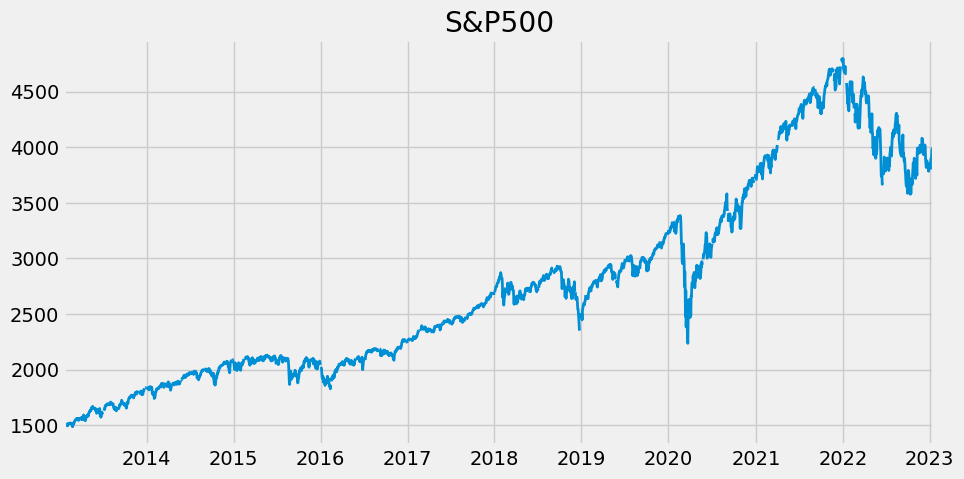

In [16]:
sp500.plot(figsize=(10, 5), title='S&P500', lw=2)


In [48]:
unemp_df =fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [49]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [50]:
uemp_results = pd.concat(all_results, axis=1)

In [51]:
umemp_states = uemp_results.drop('UNRATE', axis=1)

In [79]:
umemp_states.columns.str.startswith('U2').sum()
umemp_states = umemp_states.drop(umemp_states.filter(regex=r'^U2', axis=1).columns, axis = 1)

In [81]:
umemp_states = umemp_states.drop('2022-12-01')

In [82]:
umemp_states

,CAUR,FLUR,NYUR,TXUR,OHUR,MIUR,PAUR,MNUR,NJUR,ILUR,IAUR,NCUR,ALUR,MAUR,WAUR,GAUR,TNUR,INUR,WVUR,AZUR,COUR,KYUR,MOUR,VAUR,ARUR,WIUR,OKUR,NMUR,NVUR,ORUR,SCUR,MDUR,AKUR,UTUR,MSUR,LAUR,MTUR,CTUR,NEUR,NDUR,HIUR,MEUR,SDUR,KSUR,NHUR,DCUR,PRUR,DEUR,WYUR,IDUR,VTUR,RIUR,CNERUR,CMWRUR,CSOUUR,CWSTUR,CNEWUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,3.9,2.7,4.3,4.0,3.9,4.2,4.3,1.8,3.7,4.4,2.5,3.4,2.6,3.5,3.7,2.8,3.3,2.6,3.7,3.3,3.3,3.7,2.5,2.7,3.3,3.0,2.9,4.5,4.4,3.5,3.2,3.9,4.5,2.0,3.6,3.7,2.7,3.7,2.0,2.3,4.0,2.8,2.3,2.4,2.0,5.2,5.9,4.4,3.0,2.6,2.1,2.7,4.0,3.3,3.4,3.7,3.3
2022-08-01,4.1,2.7,4.7,4.1,4.0,4.1,4.2,1.9,4.0,4.5,2.6,3.5,2.6,3.6,3.7,2.8,3.4,2.8,3.9,3.5,3.4,3.8,2.5,2.6,3.4,3.1,3.1,4.4,4.4,3.7,3.1,4.3,4.6,2.0,3.6,3.5,2.8,4.1,2.1,2.3,4.0,3.1,2.3,2.5,2.0,5.1,5.8,4.5,3.1,2.7,2.1,2.8,4.1,3.4,3.4,3.7,3.4
2022-09-01,3.8,2.5,4.3,4.0,4.0,4.1,4.1,2.0,3.3,4.5,2.7,3.6,2.6,3.4,3.7,2.8,3.4,2.8,4.0,3.7,3.4,3.8,2.4,2.6,3.5,3.2,3.2,4.2,4.4,3.8,3.2,4.0,4.4,2.1,3.6,3.4,2.9,4.0,2.2,2.2,3.5,3.3,2.3,2.6,2.2,4.7,NaN,4.3,3.3,2.8,2.1,3.1,3.9,3.4,3.3,3.7,3.3
2022-10-01,4.0,2.7,4.3,4.0,4.2,4.2,4.0,2.1,3.4,4.6,2.9,3.8,2.7,3.5,3.8,2.9,3.5,3.0,4.0,3.9,3.6,3.9,2.6,2.7,3.6,3.3,3.4,4.3,4.6,4.1,3.3,4.5,4.5,2.1,3.8,3.3,3.0,4.3,2.4,2.3,3.3,3.6,2.4,2.8,2.4,4.8,NaN,4.3,3.5,2.9,2.3,3.4,3.9,3.5,3.4,3.8,3.4


<AxesSubplot: >

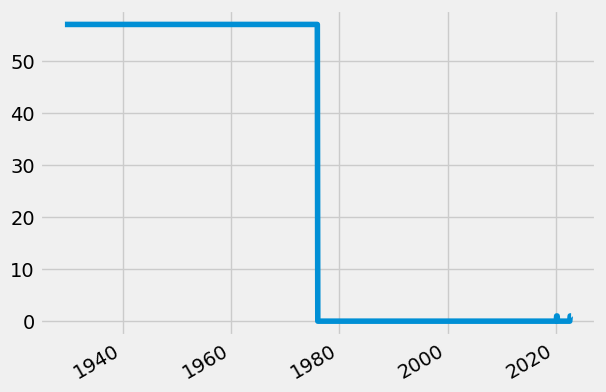

In [83]:
umemp_states.isna().sum(axis=1).plot()

In [84]:
umemp_states = umemp_states.dropna()
d_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
umemp_states.columns = [d_to_state[c] for c in umemp_states.columns]

In [102]:
umemp_states


,California,Florida,New York,Texas,Ohio,Michigan,Pennsylvania,Minnesota,New Jersey,Illinois,Iowa,North Carolina,Alabama,Massachusetts,Washington,Georgia,Tennessee,Indiana,West Virginia,Arizona,Colorado,Kentucky,Missouri,Virginia,Arkansas,Wisconsin,Oklahoma,New Mexico,Nevada,Oregon,South Carolina,Maryland,Alaska,Utah,Mississippi,Louisiana,Montana,Connecticut,Nebraska,North Dakota,Hawaii,Maine,South Dakota,Kansas,New Hampshire,the District of Columbia,Puerto Rico,Delaware,Wyoming,Idaho,Vermont,Rhode Island,Northeast Census Region,Midwest Census Region,South Census Region,West Census Region,New England Census Division
1976-01-01,9.2,9.7,10.3,5.8,8.1,9.9,8.0,6.0,10.3,6.6,4.3,6.4,6.6,10.5,8.5,8.4,6.0,6.6,7.5,10.2,5.8,5.6,5.9,6.1,7.3,5.8,5.8,8.6,9.2,9.5,7.4,6.4,7.1,5.8,6.7,6.3,5.8,9.8,3.3,3.4,9.8,8.7,3.3,4.2,6.5,8.7,19.6,8.0,4.1,5.6,8.6,7.8,9.6,6.8,6.9,8.6,9.6
1976-02-01,9.2,9.7,10.3,5.8,8.1,9.9,8.1,6.0,10.3,6.6,4.3,6.4,6.6,10.5,8.5,8.4,6.0,6.6,7.5,10.2,5.7,5.6,5.9,6.1,7.3,5.8,5.8,8.7,9.2,9.5,7.4,6.4,7.1,5.9,6.7,6.3,5.8,9.8,3.3,3.4,9.8,8.7,3.3,4.2,6.5,8.7,19.5,8.0,4.1,5.6,8.6,7.8,9.6,6.8,6.9,8.6,9.6
1976-03-01,9.1,9.6,10.2,5.9,8.1,9.9,8.1,5.9,10.3,6.6,4.3,6.4,6.6,10.5,8.4,8.4,6.0,6.5,7.5,10.1,5.7,5.6,5.9,6.1,7.3,5.7,5.8,8.7,9.2,9.4,7.3,6.4,7.0,5.8,6.6,6.3,5.8,9.8,3.3,3.4,9.8,8.6,3.2,4.2,6.5,8.6,19.3,8.0,4.1,5.6,8.6,7.7,9.6,6.8,6.9,8.6,9.6
1976-04-01,9.1,9.5,10.2,5.9,8.0,9.8,8.1,5.8,10.3,6.6,4.2,6.3,6.5,10.3,8.5,8.3,6.0,6.3,7.5,10.0,5.6,5.6,6.0,6.0,7.2,5.6,5.8,8.6,9.0,9.2,7.2,6.4,6.9,5.8,6.4,6.4,5.8,9.6,3.2,3.5,9.7,8.6,3.1,4.2,6.5,8.5,19.0,8.1,4.0,5.6,8.6,7.7,9.5,6.7,6.8,8.5,9.4
1976-05-01,9.0,9.3,10.1,5.9,7.8,9.6,8.1,5.7,10.3,6.6,4.1,6.1,6.4,10.1,8.5,8.1,5.9,6.0,7.4,9.8,5.6,5.5,6.0,5.9,7.1,5.5,5.7,8.6,8.9,9.1,7.0,6.5,6.9,5.7,6.3,6.5,5.8,9.4,3.1,3.6,9.4,8.5,3.1,4.2,6.5,8.4,18.9,8.3,3.9,5.6,8.5,7.7,9.5,6.6,6.7,8.5,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,3.0,4.5,4.3,4.0,4.3,4.8,2.2,4.1,4.6,3.0,3.4,2.8,4.1,4.1,3.1,3.2,2.2,3.6,3.2,3.6,3.9,3.4,3.0,3.2,2.8,2.7,5.3,5.0,3.7,3.3,4.2,4.8,1.9,4.1,4.1,2.3,4.4,1.9,2.8,4.1,3.3,2.3,2.4,2.3,5.8,6.4,4.5,3.3,2.6,2.5,3.2,4.4,3.5,3.6,4.1,3.8
2022-05-01,4.3,2.9,4.4,4.2,3.9,4.3,4.6,2.0,3.9,4.6,2.7,3.4,2.7,3.9,3.9,3.0,3.3,2.2,3.5,3.2,3.5,3.8,3.1,3.0,3.2,2.9,2.8,5.1,4.9,3.5,3.3,4.0,4.6,2.0,3.9,4.0,2.4,4.2,1.9,2.6,4.1,3.2,2.3,2.3,2.1,5.7,6.2,4.5,3.2,2.5,2.3,2.9,4.2,3.4,3.5,4.0,3.6
2022-06-01,4.2,2.8,4.4,4.1,3.9,4.3,4.5,1.8,3.9,4.5,2.6,3.4,2.6,3.7,3.8,2.9,3.3,2.4,3.6,3.3,3.4,3.7,2.8,2.8,3.2,2.9,2.9,4.9,4.7,3.5,3.2,4.0,4.6,2.0,3.8,3.8,2.6,4.0,1.9,2.5,4.2,3.0,2.3,2.4,2.0,5.5,6.1,4.5,3.1,2.5,2.2,2.7,4.1,3.3,3.4,3.8,3.5
2022-07-01,3.9,2.7,4.3,4.0,3.9,4.2,4.3,1.8,3.7,4.4,2.5,3.4,2.6,3.5,3.7,2.8,3.3,2.6,3.7,3.3,3.3,3.7,2.5,2.7,3.3,3.0,2.9,4.5,4.4,3.5,3.2,3.9,4.5,2.0,3.6,3.7,2.7,3.7,2.0,2.3,4.0,2.8,2.3,2.4,2.0,5.2,5.9,4.4,3.0,2.6,2.1,2.7,4.0,3.3,3.4,3.7,3.3


In [103]:
px.line(umemp_states)

Aplril 2020

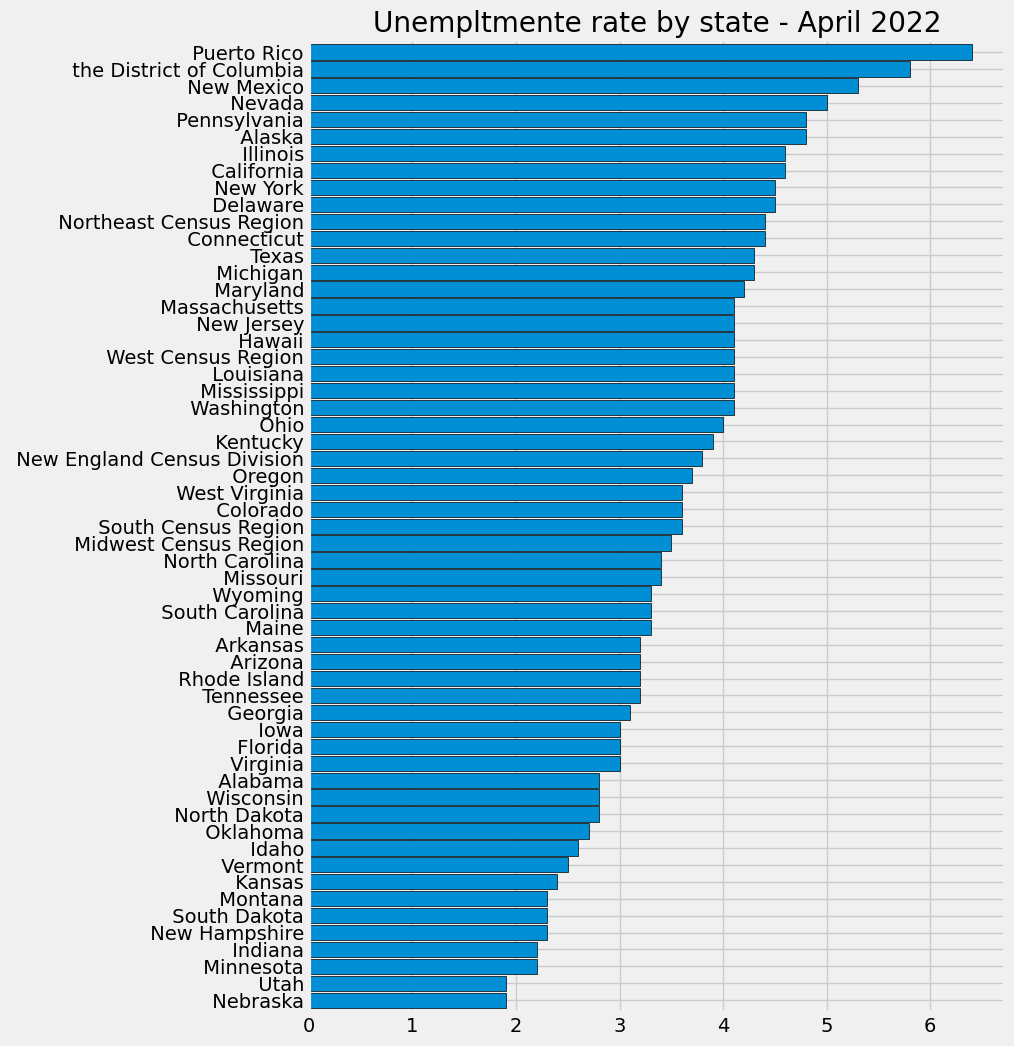

In [105]:
ax = umemp_states.loc[umemp_states.index =='2022-04-01'].T.sort_values('2022-04-01').plot(kind='barh', figsize=(8, 12), width=.9, edgecolor='black', title='Unempltmente rate by state - April 2022')
ax.legend().remove()
plt.show()
